In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('summarize.1.log', delim_whitespace=True, header=None, index_col=0)
df[1].replace(regex=True,inplace=True,to_replace=r'r=',value=r'')
df[1] = df[1].values.astype(float)

t-SNE done! Time elapsed: 0.15444111824035645 seconds
Index(['Temoridae', 'Phaeodaria', 'Haloptilus', 'Limacinidae',
       'zoea__Decapoda', 'gonophore__Diphyidae', 'nectophore__Diphyidae',
       'nauplii__Crustacea', 'multiple__Copepoda', 'Penilia', 'Foraminifera',
       'Euchaetidae', 'tail__Appendicularia', 'Oikopleuridae', 'egg__other',
       'Noctiluca', 'Evadne', 'nauplii__Cirripedia', 'Oncaeidae',
       'Eucalanidae', 'tail__Chaetognatha', 'Ostracoda', 'multiple__other',
       'eudoxie__Diphyidae', 'Salpida', 'Harpacticoida', 'Fritillariidae'],
      dtype='object', name=0)


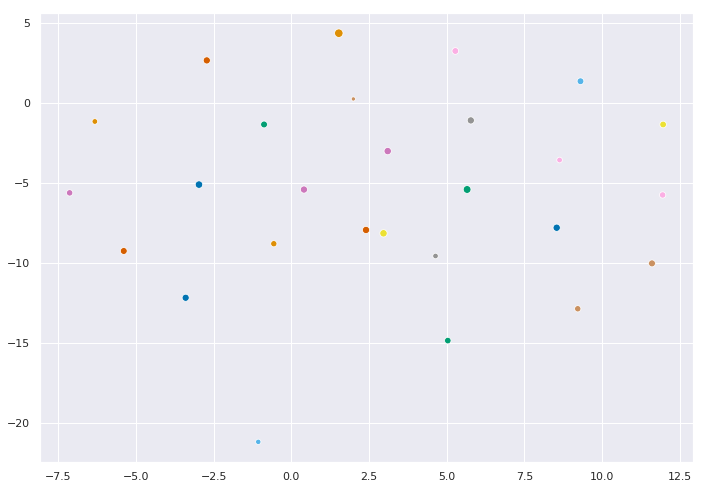

In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline

sns.set(rc={'figure.figsize':(11.7,8.27)})
time_start = time.time()

tsne = TSNE(random_state=42).fit_transform(df)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
sns.scatterplot(tsne[:,0],tsne[:,1], size=df[1], hue=df.index,palette='colorblind', legend=None)
print(df.index)

In [ ]:
from keras.models import load_model
import testing as T
base_model = load_model('models/epoch_8.model')

In [ ]:
import os


tdir='validate'
classes = os.listdir(tdir)
res = {}
for c in classes:
    images = os.listdir(os.path.join(tdir,c))
    res[c] = [ T.class_file(base_model, os.path.join(tdir,c,f)) for f in images[:50]]

In [ ]:
data = pd.DataFrame()
for c in classes:
    arr = np.asarray(res[c]).reshape(50,64)
    new_data = pd.DataFrame(arr)
    #print(new_data)
    new_data.insert(0, value=c, column='species')
    data = data.append(new_data)
print(data)
np.shape(data)

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
time_start = time.time()
tsne = TSNE(random_state=42).fit_transform(data.drop('species', axis=1))

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
sns.scatterplot(tsne[:,0],tsne[:,1],hue=data['species'], palette='colorblind', legend=False)